## Soft Actor-Critic

### Value Iteration

In [1]:
import jax.numpy as jnp
import jax.random as jrandom

import jax

from src.systems.linear import StochasticDoubleIntegrator
from src.RL.PolicyGradient.SoftActorCritic.main import *

import numpy as np
import matplotlib.pyplot as plt


In [2]:
key = jrandom.PRNGKey(0)
buffer_size = 1000

# Init environment
x0 = jnp.array([2, 0])
SDI = StochasticDoubleIntegrator(x0)
SAC = SoftActorCritic(2, 1, key, buffer_size=buffer_size)

# Set learning rates
SAC.SVF.eta = 1e-1
SAC.SQF_1.eta = 1e-1
SAC.SQF_2.eta = 1e-1
SAC.PI.eta = 1e0

Nx = 10
x_space = np.linspace(-5, 5, Nx)
v_space = np.linspace(-5, 5, Nx)
u_space = np.linspace(-4, 4, 10)

def cost_to_normalized_reward(x):
    x = x/4.1
    return -min(x, 1)

for x in x_space:
    for v in v_space:
        state = jnp.array([x, v])
        for u in u_space:
            cost = SDI.cost(state, u)
            key, _ = jrandom.split(key)
            new_state = SDI.get_state_update(key, state, u)
            SAC.ReplayBuffer.store((state, u, cost_to_normalized_reward(cost), new_state))
            


In [3]:
key = jrandom.PRNGKey(0)
SAC.train(key, batch_size=50, n_epochs=400, show=True)


angle=0.507
angle=0.505
angle=0.505
angle=0.505
angle=0.505
angle=0.505
angle=0.505
angle=0.506
angle=0.506
angle=0.506
angle=0.506
angle=0.506
angle=0.506
angle=0.505
angle=0.504
angle=0.503
angle=0.503
angle=0.503
angle=0.502
angle=0.501
angle=0.500
angle=0.499
angle=0.498
angle=0.497
angle=0.496
angle=0.495
angle=0.494
angle=0.493
angle=0.492
angle=0.491
angle=0.489
angle=0.488
angle=0.487
angle=0.486
angle=0.485
angle=0.483
angle=0.482
angle=0.481
angle=0.480
angle=0.478
angle=0.477
angle=0.476
angle=0.475
angle=0.473
angle=0.472
angle=0.471
angle=0.470
angle=0.468
angle=0.467
angle=0.465
angle=0.464
angle=0.462
angle=0.461
angle=0.459
angle=0.458
angle=0.457
angle=0.455
angle=0.454
angle=0.453
angle=0.452
angle=0.450
angle=0.449
angle=0.448
angle=0.447
angle=0.446
angle=0.445
angle=0.443
angle=0.442
angle=0.440
angle=0.439
angle=0.437
angle=0.436
angle=0.434
angle=0.433
angle=0.431
angle=0.430
angle=0.429
angle=0.427
angle=0.426
angle=0.425
angle=0.423
angle=0.422
angle=0.421
angl

In [4]:
# key = jrandom.PRNGKey(0)
# for i in range(20):
#     SAC.train(key, batch_size=20, n_epochs=2, show=False)
#     print(SAC.PI.model.mu_layer.weight)



DeviceArray(-0.01234568, dtype=float32)

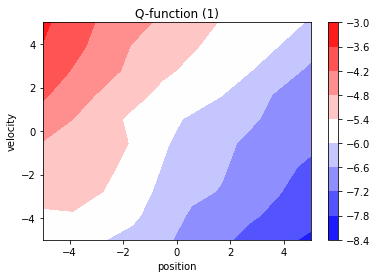

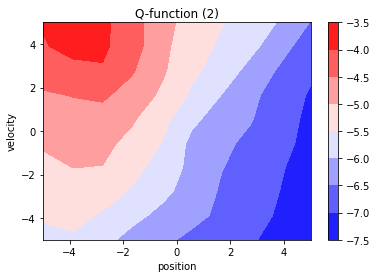

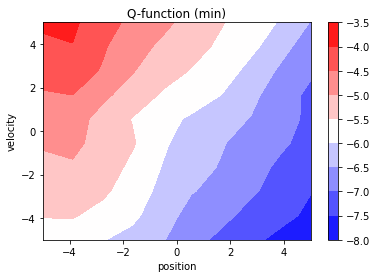

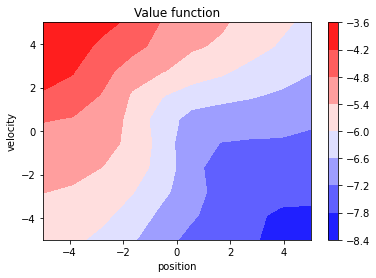

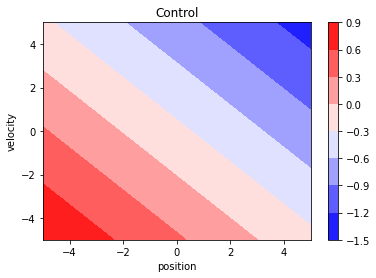

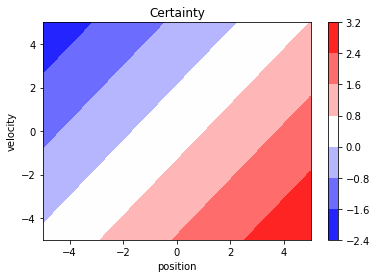

In [4]:
from matplotlib import cm
n=10
x = np.linspace(-5,5,n)
y = np.linspace(-5,5,n)
xv, yv = np.meshgrid(x,y)
zv = np.zeros((n, n))
zq = np.zeros((n, n))
zq1 = np.zeros((n,n))
zq2 = np.zeros((n,n))
zu = np.zeros((n, n))
zp = np.zeros((n, n))

Nu = 20
u_space = np.linspace(-4, 4, Nu)
Q = np.zeros(((n,n,Nu)))

for i in range(n):
    for j in range(n):
        for k in range(Nu):
            u = u_space[k]
            q1_val = SAC.SQF_1.predict(jnp.array([xv[i,j], yv[i,j]]), u)
            q2_val = SAC.SQF_2.predict(jnp.array([xv[i,j], yv[i,j]]), u)
            Q[i,j,k] = min(q1_val, q2_val)
        v_val = SAC.SVF.predict(jnp.array([xv[i,j], yv[i,j]]))
        q1_val = SAC.SQF_1.predict(jnp.array([xv[i,j], yv[i,j]]), 0)
        q2_val = SAC.SQF_2.predict(jnp.array([xv[i,j], yv[i,j]]), 0)
        q_val = min(q1_val, q2_val)
        u_val, log_prob = SAC.PI.get_control(jnp.array([xv[i,j], yv[i,j]]), key, deterministic=True)
        #_, u_val = SAC.get_control(jnp.array([xv[i,j], yv[i,j]]))
        zv[i,j] = v_val
        zu[i,j] = u_val
        zp[i,j] = log_prob
        zq[i,j] = q_val
        zq1[i,j] = q1_val
        zq2[i,j] = q2_val

plt.contourf(xv, yv, zq1, cmap=cm.bwr)
plt.xlabel('position')
plt.ylabel('velocity')
plt.colorbar()
plt.title('Q-function (1)')
plt.show()

plt.contourf(xv, yv, zq2, cmap=cm.bwr)
plt.xlabel('position')
plt.ylabel('velocity')
plt.colorbar()
plt.title('Q-function (2)')
plt.show()

plt.contourf(xv, yv, zq, cmap=cm.bwr)
plt.xlabel('position')
plt.ylabel('velocity')
plt.colorbar()
plt.title('Q-function (min)')
plt.show()

plt.contourf(xv, yv, zv, cmap=cm.bwr)
plt.xlabel('position')
plt.ylabel('velocity')
plt.colorbar()
plt.title('Value function')
plt.show()

plt.contourf(xv, yv, zu, cmap=cm.bwr)
plt.xlabel('position')
plt.ylabel('velocity')
plt.colorbar()
plt.title('Control')
plt.show()

plt.contourf(xv, yv, zp, cmap=cm.bwr)
plt.xlabel('position')
plt.ylabel('velocity')
plt.colorbar()
plt.title('Certainty')
plt.show()



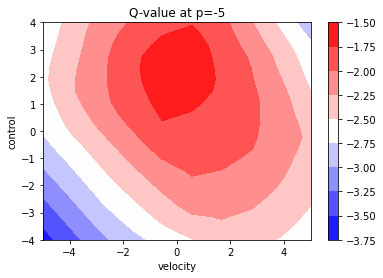

In [8]:
uw, yw = np.meshgrid(u_space, y)

plt.contourf(yw, uw, Q[0,:,:], cmap=cm.bwr)
plt.xlabel('velocity')
plt.ylabel('control')
plt.colorbar()
plt.title('Q-value at p=-5')
plt.show()


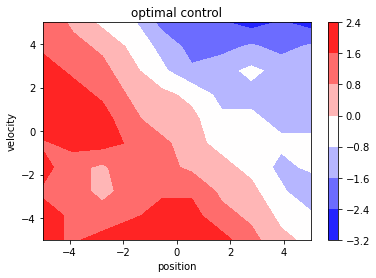

In [9]:
Q_idx = np.argmax(Q, axis=2)
Qu = np.zeros_like(Q_idx, dtype=np.float32)
for i, row in enumerate(Q_idx):
    for j, item in enumerate(row):
        Qu[i,j] = u_space[item]

plt.contourf(xv, yv, Qu, cmap=cm.bwr)
plt.xlabel('position')
plt.ylabel('velocity')
plt.colorbar()
plt.title('optimal control')
plt.show()